In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
data=pd.read_csv('StudentsPerformance.csv')

In [88]:
data.head()
data["overall score"] = round((data["math score"] + data["writing score"] + data["reading score"]) / 3, 2)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


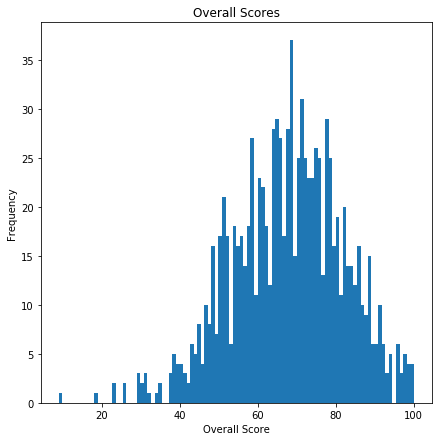

In [171]:
data['overall score'].plot(kind='hist', bins=100, figsize=(7,7))
plt.xlabel("Overall Score")
plt.ylabel("Frequency")
plt.title("Overall Scores")
plt.show()

In [89]:
data.describe()

,math score,reading score,writing score,overall score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770580
std,15.16308,14.600192,15.195657,14.257311
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.330000
50%,66.00000,70.000000,69.000000,68.330000
75%,77.00000,79.000000,79.000000,77.670000
max,100.00000,100.000000,100.000000,100.000000


In [90]:
data[data.isnull()=='True'].count()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
overall score                  0
dtype: int64

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
overall score                  1000 non-null float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [170]:
data.groupby("parental level of education", as_index=True)[["math score", "reading score", "writing score"]].mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [92]:
data.corr()

,math score,reading score,writing score,overall score
math score,1.000000,0.817580,0.802642,0.918744
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965669
overall score,0.918744,0.970331,0.965669,1.000000


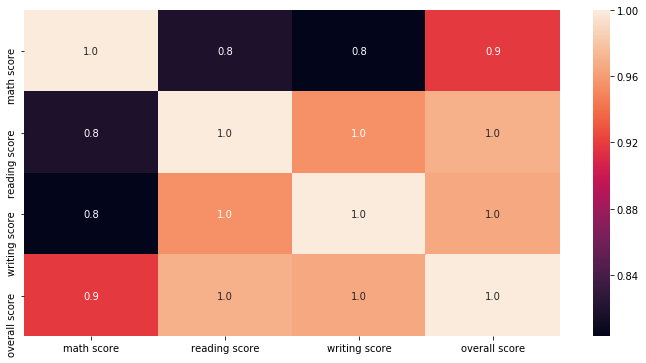

In [93]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [94]:
print("Gender")
print(data.gender.value_counts())


Gender
female    518
male      482
Name: gender, dtype: int64


In [95]:
print("Race/Ethnicity")
print(data['race/ethnicity'].value_counts())


Race/Ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


In [96]:
print("Parents Education ")
print(data['parental level of education'].value_counts())

Parents Education 
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


Text(0.5,1,'Number of males and females in the dataset')

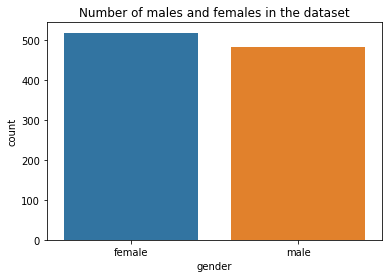

In [97]:
sns.countplot(x=data['gender'])
plt.title('Number of males and females in the dataset')

Text(0.5,1,'Number of different races people')

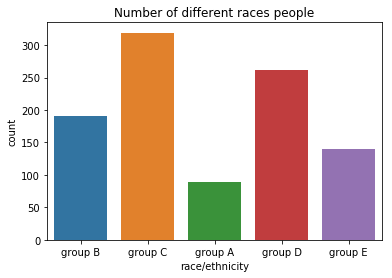

In [120]:
sns.countplot(x=data['race/ethnicity'])
plt.title('Number of different races people')

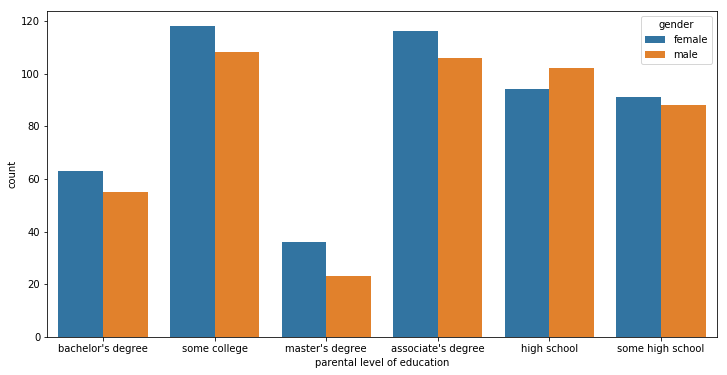

In [125]:
plt.figure(figsize=(12,6))
sns.countplot(x='parental level of education', data = data, hue='gender')
plt.show()

([<matplotlib.patches.Wedge at 0x28ecc058d68>,
 [Text(1.58592,0.455355,'Group A'),
  Text(0.664796,1.51015,'Group B'),
  Text(-1.52834,0.621837,'Group C'),
  Text(-0.217081,-1.63566,'Group D'),
  Text(1.49296,-0.702536,'Group E')],
 [Text(0.865049,0.248376,'8.9%'),
  Text(0.362616,0.823717,'19.0%'),
  Text(-0.833639,0.339184,'31.9%'),
  Text(-0.118408,-0.892177,'26.2%'),
  Text(0.814344,-0.383201,'14.0%')])

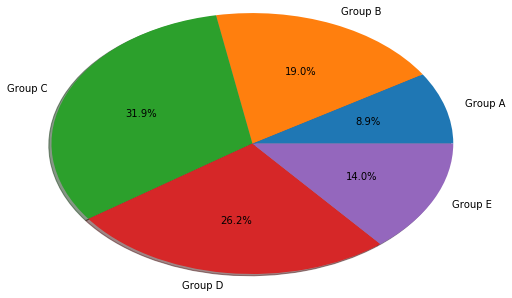

In [100]:
race_val=[89,190,319,262,140]
race_labels=['Group A','Group B','Group C','Group D','Group E']
plt.pie(race_val,labels=race_labels,radius=1.5,autopct='%0.1f%%',shadow=True)

In [101]:
print("Lunch Type")
print(data.lunch.value_counts())

Lunch Type
standard        645
free/reduced    355
Name: lunch, dtype: int64


Text(0.5,1,'Lunch type')

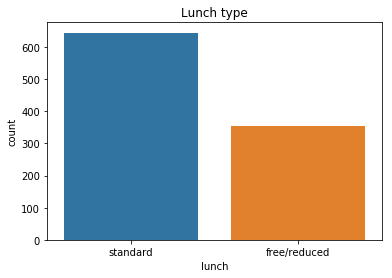

In [102]:
sns.countplot(x=data['lunch'])
plt.title('Lunch type')

In [103]:
print("Test Preperation course")
print(data['test preparation course'].value_counts())

Test Preperation course
none         642
completed    358
Name: test preparation course, dtype: int64


Text(0.5,1,'Test Preperation')

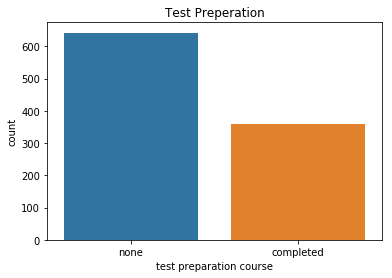

In [104]:
sns.countplot(x=data['test preparation course'])
plt.title('Test Preperation')

In [105]:
print("Female")
print(data['race/ethnicity'][data.gender=='female'].value_counts())

Female
group C    180
group D    129
group B    104
group E     69
group A     36
Name: race/ethnicity, dtype: int64


In [106]:
print("Male")
print(data['race/ethnicity'][data.gender=='male'].value_counts())

Male
group C    139
group D    133
group B     86
group E     71
group A     53
Name: race/ethnicity, dtype: int64


In [107]:
print("Male")
print(data['lunch'][data.gender=='male'].value_counts(normalize=True))

Male
standard        0.655602
free/reduced    0.344398
Name: lunch, dtype: float64


In [108]:
print("Female")
print(data['lunch'][data.gender=='female'].value_counts(normalize=True))

Female
standard        0.635135
free/reduced    0.364865
Name: lunch, dtype: float64


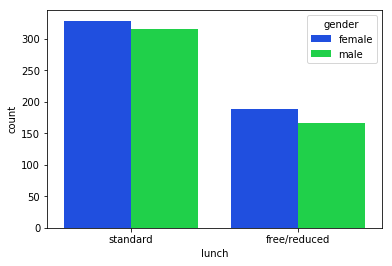

In [159]:
sns.countplot(x='lunch', data =data, hue='gender', palette='bright')
plt.show()

In [109]:
female1=data[data.gender=='female']
male1=data[data.gender=='male']
print("MATH SCORE")
print("Female")
print("------")
print(female1.groupby(['lunch','test preparation course'])['math score'].max().unstack(level = 'lunch'))
print("Male")
print("------")
print(male1.groupby(['lunch','test preparation course'])['math score'].max().unstack(level = 'lunch'))

MATH SCORE
Female
------
lunch                    free/reduced  standard
test preparation course                        
completed                          93        99
none                               81       100
Male
------
lunch                    free/reduced  standard
test preparation course                        
completed                         100       100
none                               93        97


In [110]:
print("READING SCORE")
print("Female")
print("------")
print(female1.groupby(['lunch','test preparation course'])['reading score'].max().unstack(level = 'lunch'))
print("Male")
print("------")
print(male1.groupby(['lunch','test preparation course'])['reading score'].max().unstack(level = 'lunch'))

READING SCORE
Female
------
lunch                    free/reduced  standard
test preparation course                        
completed                         100       100
none                               92       100
Male
------
lunch                    free/reduced  standard
test preparation course                        
completed                         100       100
none                               90        96


In [111]:
print("WRITING SCORE")
print("Female")
print("------")
print(female1.groupby(['lunch','test preparation course'])['writing score'].max().unstack(level = 'lunch'))
print("Male")
print("------")
print(male1.groupby(['lunch','test preparation course'])['writing score'].max().unstack(level = 'lunch'))

WRITING SCORE
Female
------
lunch                    free/reduced  standard
test preparation course                        
completed                         100       100
none                               93       100
Male
------
lunch                    free/reduced  standard
test preparation course                        
completed                          93       100
none                               83        92


In [112]:
print("OVERALL SCORE")
print("Female")
print("------")
print(female1.groupby(['lunch','test preparation course'])['overall score'].max().unstack(level = 'lunch'))
print("Male")
print("------")
print(male1.groupby(['lunch','test preparation course'])['overall score'].max().unstack(level = 'lunch'))

OVERALL SCORE
Female
------
lunch                    free/reduced  standard
test preparation course                        
completed                       97.67     99.67
none                            87.00    100.00
Male
------
lunch                    free/reduced  standard
test preparation course                        
completed                       97.67    100.00
none                            88.67     93.67


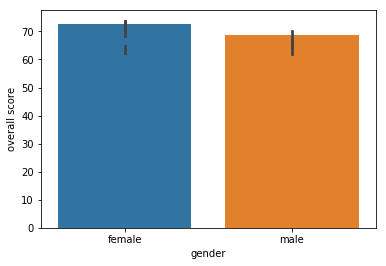

In [113]:
sns.barplot(x='gender',y='math score',data=data)



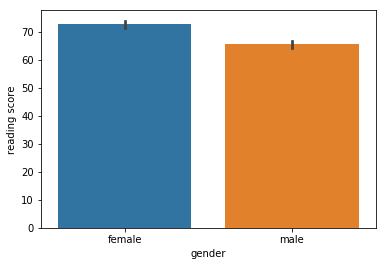

In [114]:
sns.barplot(x='gender',y='reading score',data=data)

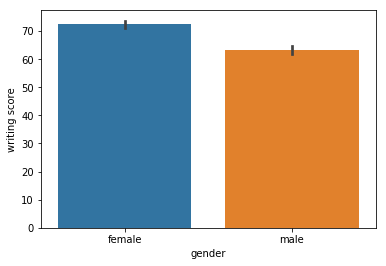

In [115]:
sns.barplot(x='gender',y='writing score',data=data)

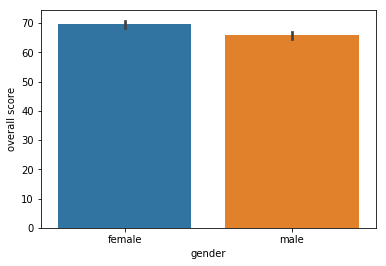

In [126]:
sns.barplot(x='gender',y='overall score',data=data)

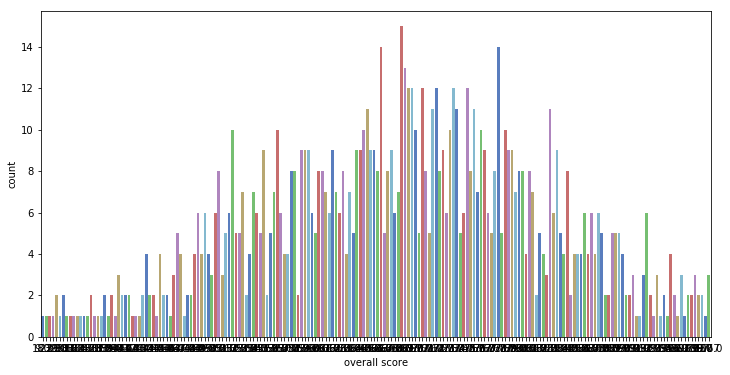

In [129]:
plt.figure(figsize=(12,6))
sns.countplot(x="overall score", data = data, palette="muted")
plt.show()

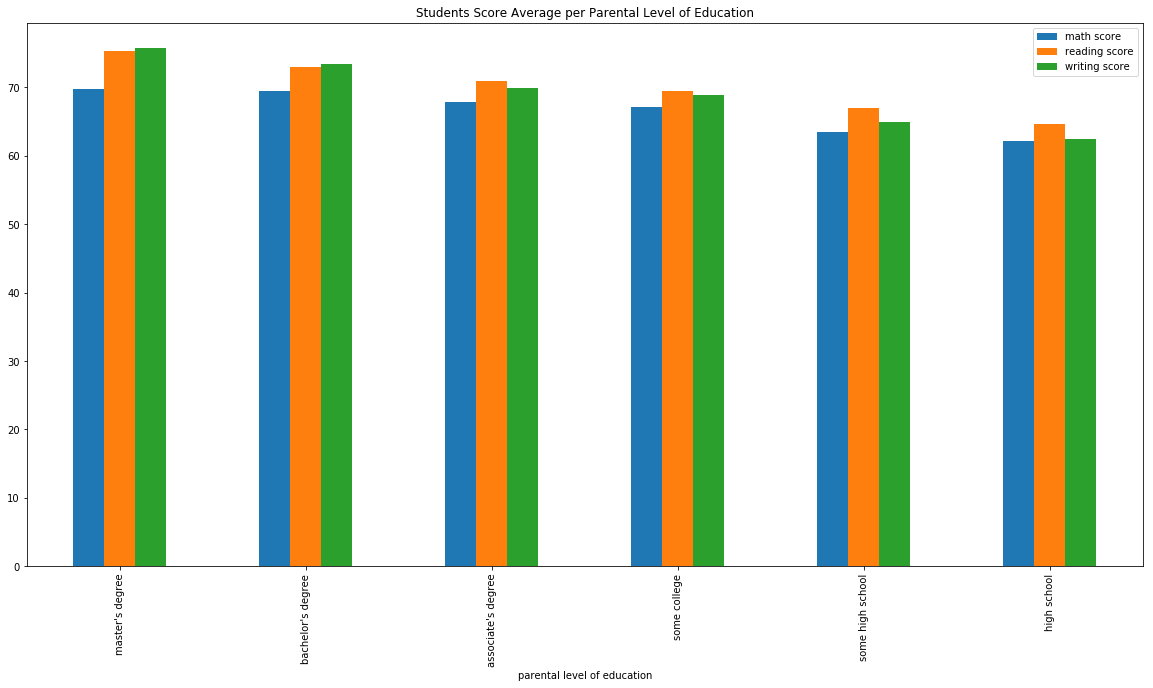

In [133]:
score_grouped = data.groupby("parental level of education", as_index=True)[["math score", "reading score", "writing score"]].mean().sort_values(by='writing score',ascending=False)
score_grouped.plot.bar(title = "Students Score Average per Parental Level of Education", figsize=(20,10))

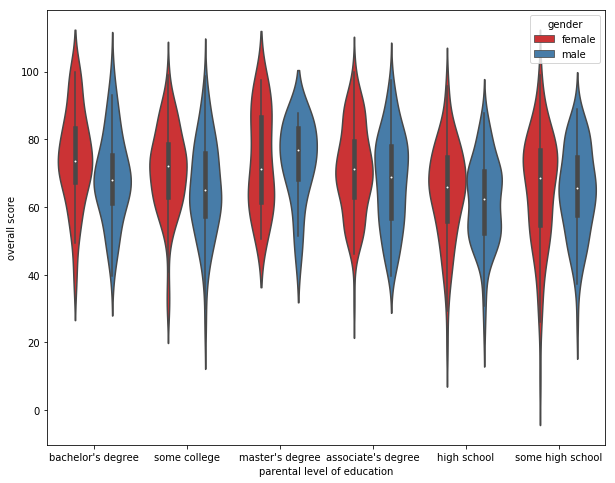

In [155]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='parental level of education',y='overall score',data=data,kind='bar',hue='gender',palette='Set1')

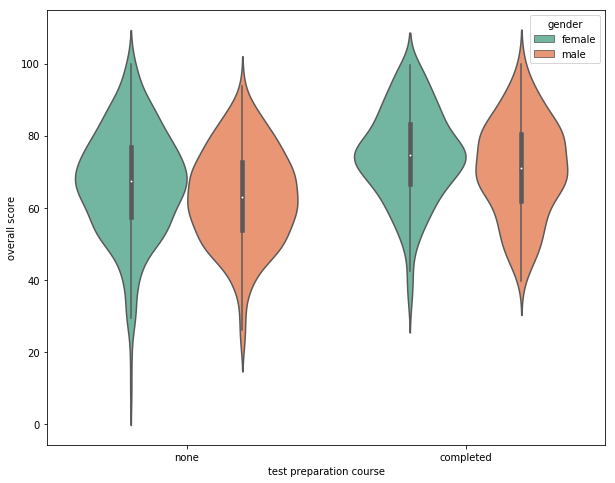

In [160]:
plt.figure(figsize=(10, 8))
sns.violinplot(x='test preparation course',y='overall score',data=data,kind='bar',hue='gender',palette='Set2')

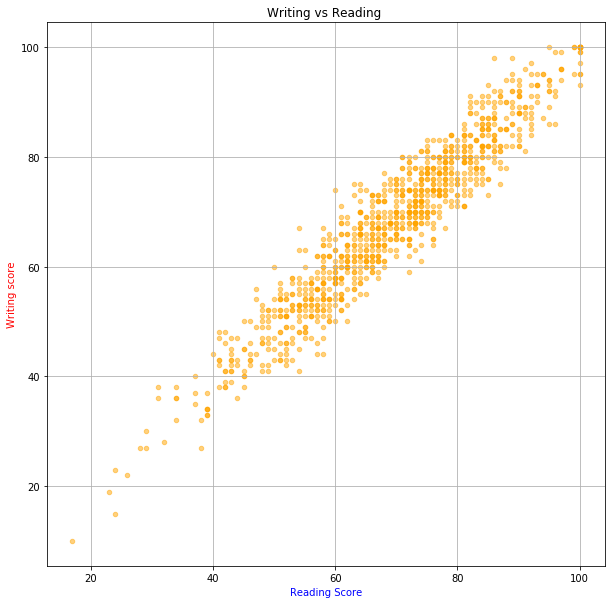

In [173]:
data.plot(kind="scatter", x = "reading score",y = "overall score",alpha = 0.5,color = "orange",grid = True,figsize = (10,10))
plt.xlabel("Reading Score",color = "blue")
plt.ylabel("Overall score",color = "r")
plt.title("Overall vs Reading ")
plt.show()

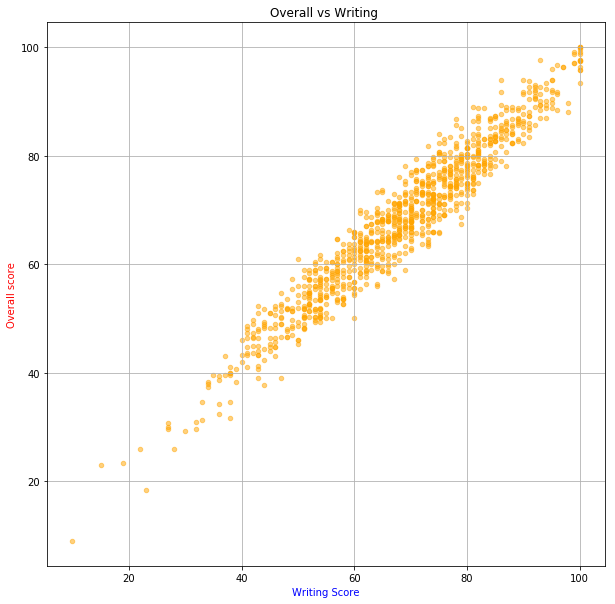

In [177]:
data.plot(kind="scatter", x = "writing score",y = "overall score",alpha = 0.5,color = "orange",grid = True,figsize = (10,10))
plt.xlabel("Writing Score",color = "blue")
plt.ylabel("Overall score",color = "r")
plt.title("Overall vs Writing ")
plt.show()

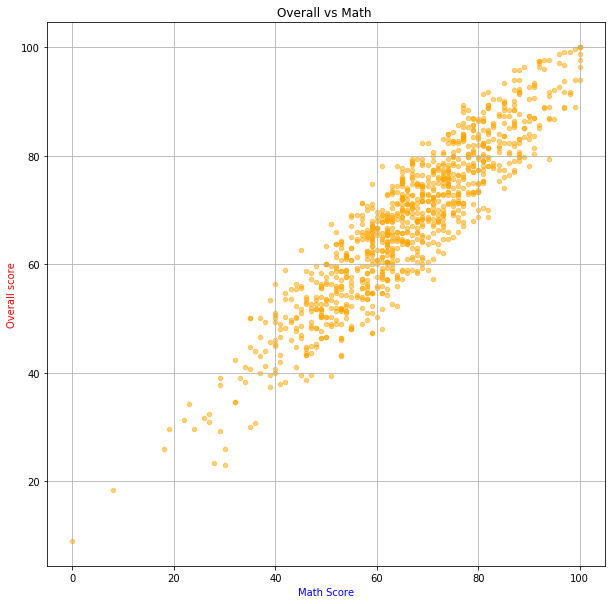

In [178]:
data.plot(kind="scatter", x = "math score",y = "overall score",alpha = 0.5,color = "orange",grid = True,figsize = (10,10))
plt.xlabel("Math Score",color = "blue")
plt.ylabel("Overall score",color = "r")
plt.title("Overall vs Math ")
plt.show()

In [174]:
race = round(data.groupby(by = data['race/ethnicity']).mean(), 1)
race

,math score,reading score,writing score,overall score
race/ethnicity,,,,
group A,61.6,64.7,62.7,63.0
group B,63.5,67.4,65.6,65.5
group C,64.5,69.1,67.8,67.1
group D,67.4,70.0,70.1,69.2
group E,73.8,73.0,71.4,72.8


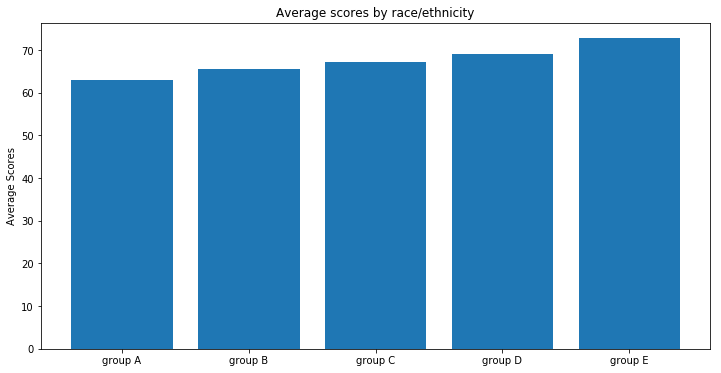

In [176]:
x = list(race.index)
y = round(race.mean(axis=1),1)

fig, ax = plt.subplots(figsize=(12,6))

rects = ax.bar(x, y)

ax.set_ylabel('Average Scores')
ax.set_title('Average scores by race/ethnicity')
ax.set_xticklabels((x))



plt.show()